# Part 1: Supervised vs unsupervised category prediction 
For my final project, I will provide a comprehensive analysis for the BBC News dataset. Here is my plan of analysis.

### Data loading and cleaning
For Data Loading and Initial Cleaning we first lost the CSV file. We will use onlyt the training data (the Kaggle competition does not include the target classes in their test data). I will clean the text by removing special characters, numbers, and extra whitespace, and convert text to lowercase for consistency

### Exploratory data analysis and visualizations
Next is text Analysis. I will look at aspects such as word count per article, unique word count, average word length, and other basic text statistics.

Following text analysis is visualizations. I will look at distribution of word counts, distribution of average word length, category distribution, Word count distribution by category, and then finally some fun word clouds for overall dataset and each category.

The EDA shows an even distribution of categories, words per category. will choose the classic supervised learning algorithms: Logistic regression, multinomial naive bayes, and linear SVM. After reading about text classification, I learned that these models perform well on TF/IDF features.

### Feature engineering
Next up is feature Engineering. I will create TF-IDF features from the cleaned text, consider n-grams (bigrams and trigrams), and extract additional features like sentence length and punctuation counts.

### Building and training models: Supervised and Unsupervised
Now for the fun part, model Selection. I've automatd the training and output of summary statistics for each of these models. First we will start with simple models: **Naive Bayes, Logistic Regression, and Linear SVM**, and then move onto the unsupervised model **Non-Negative Matrix Factorization (NMF)**


### Model analysis and evaluation Strategy:
I will output mean accuracy and overfitting mean for each model. Overfitting will be calculated by subtracting test accuracy from train accuracy. Positive values indicate higher training accuracy than test accuracy. Negative values indicate higher test accuracy than training accuracy.

### Final model analysis
My final comparison of each model (unsupervised and supervised) can be found at the bottom of the notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Download the nltk models
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/John/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/John/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data loading and cleaning

In [11]:
def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    print(f"Shape of BBC dataset: {df.shape}")
    print("\nData sample:")
    print(df.head())
    return df

def clean_text(text):
    # Convert text to lowercase for accurate comparison
    text = text.lower()
    
    # Remove special characters and numbers that can trip up categorization
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Drop whitespace
    text = ' '.join(text.split())
    
    return text

## Exploratory data analysis and visualizations

In [14]:
def get_text_stats(text):
    #Tokenize using the nltk tokenizer
    words = word_tokenize(text)
    return {
        'word_count': len(words),
        'unique_words': len(set(words)),
        'avg_word_length': np.mean([len(word) for word in words])
    }

def perform_eda(df):
    # Add text statistics
    print("Producing text statistics")
    df['clean_text'] = df['Text'].apply(clean_text)
    df['text_stats'] = df['clean_text'].apply(get_text_stats)
    
    # Append statistics to columns
    df['word_count'] = df['text_stats'].apply(lambda x: x['word_count'])
    df['unique_words'] = df['text_stats'].apply(lambda x: x['unique_words'])
    df['avg_word_length'] = df['text_stats'].apply(lambda x: x['avg_word_length'])
    
    # Create visualizations
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Distribution of word counts
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='word_count', bins=50)
    plt.title('Distribution of Word Counts')
    plt.xlabel('Word Count')
    
    # Plot 2: Distribution of average word length
    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='avg_word_length', bins=30)
    plt.title('Distribution of Average Word Length')
    plt.xlabel('Average Word Length')
    
    # Plot 3: Category distribution
    plt.subplot(2, 2, 3)
    category_counts = df['Category'].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title('Category Distribution')
    plt.xticks(rotation=45)
    
    # Plot 4: Boxplot of word counts by category
    plt.subplot(2, 2, 4)
    sns.boxplot(data=df, x='Category', y='word_count')
    plt.title('Word Count Distribution by Category')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Generate summary statistics
    print("\nSummary Statistics:")
    print(df[['word_count', 'unique_words', 'avg_word_length']].describe())
    
    return df

def create_wordcloud(df, category=None):
    #Word cloud for a fun visualization of each category
    if category:
        text = ' '.join(df[df['Category'] == category]['clean_text'])
    else:
        text = ' '.join(df['clean_text'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category if category else "All Categories"}')
    plt.show()

def produce_eda(file_path):
    '''This function pulls eda all together'''
    # Load and prep the data
    df = load_and_prepare_data(file_path)
    
    # Perform EDA
    df = perform_eda(df)
    
    # Create word clouds
    create_wordcloud(df)  # Overall word cloud
    
    # Create word clouds for each category
    for category in df['Category'].unique():
        create_wordcloud(df, category)
    
    return df

# The user should run the analysis with:
# df = main('path_to_your_bbc_news_dataset.csv')

Shape of BBC dataset: (1490, 3)

Data sample:
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
Producing text statistics


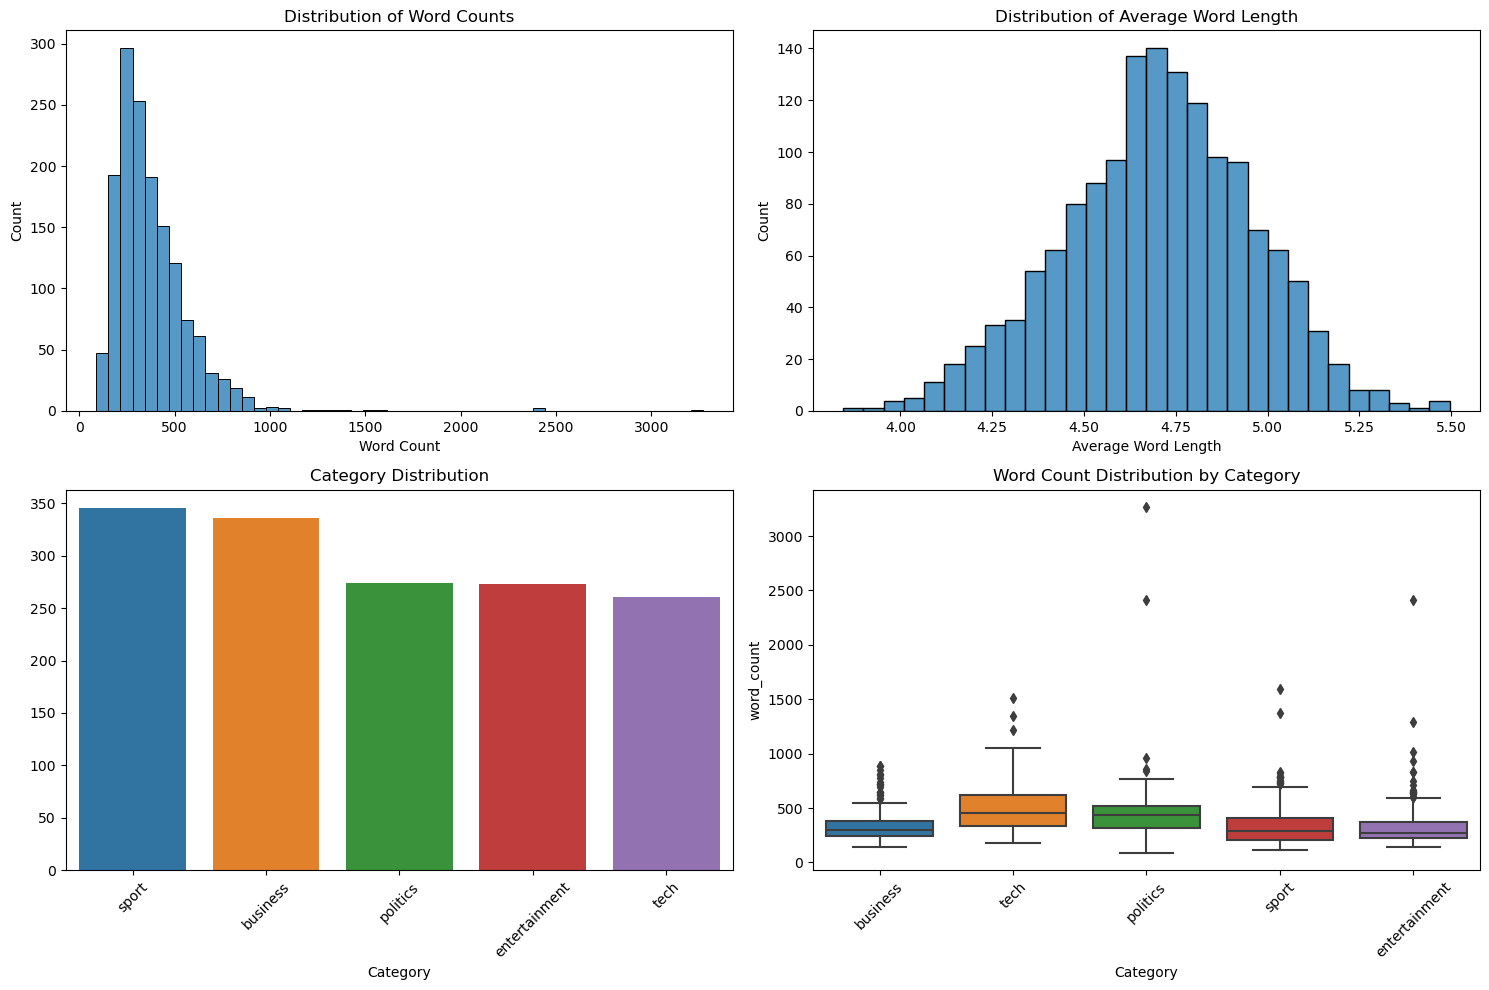


Summary Statistics:
        word_count  unique_words  avg_word_length
count  1490.000000   1490.000000      1490.000000
mean    377.066443    196.992617         4.700089
std     207.490750     79.059502         0.258496
min      89.000000     64.000000         3.844548
25%     246.000000    143.000000         4.531325
50%     330.000000    179.500000         4.708595
75%     460.750000    235.750000         4.876029
max    3269.000000    904.000000         5.495495


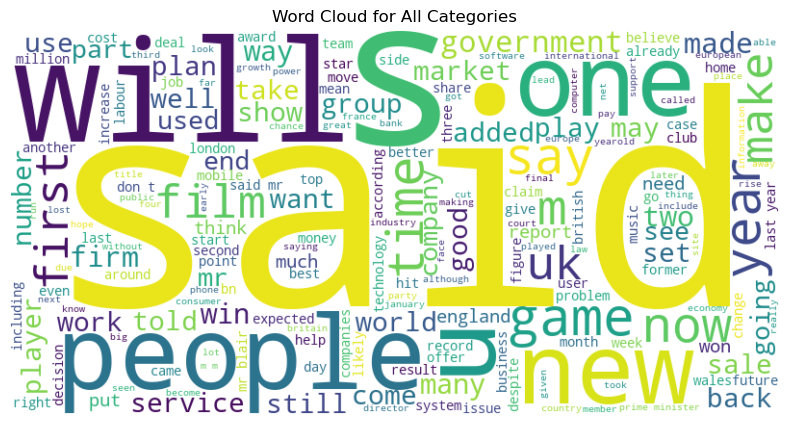

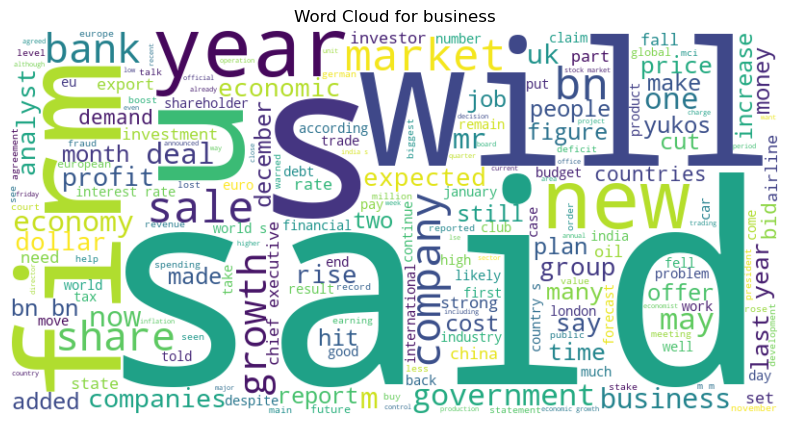

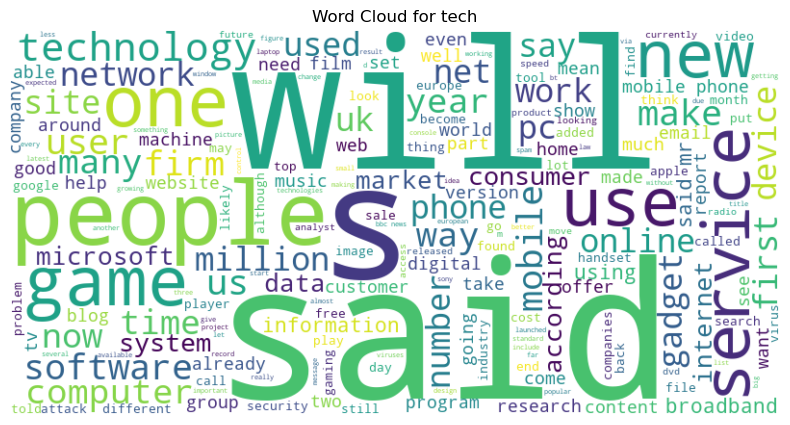

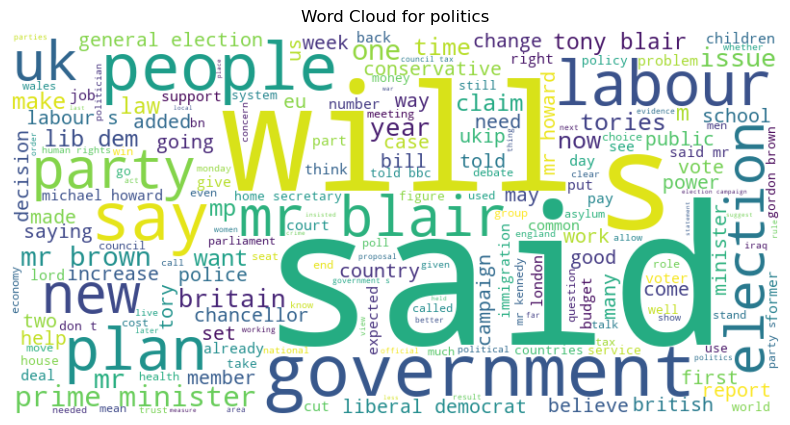

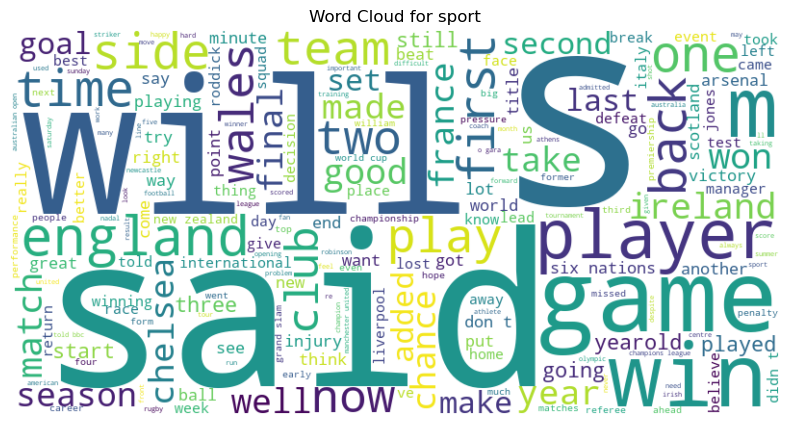

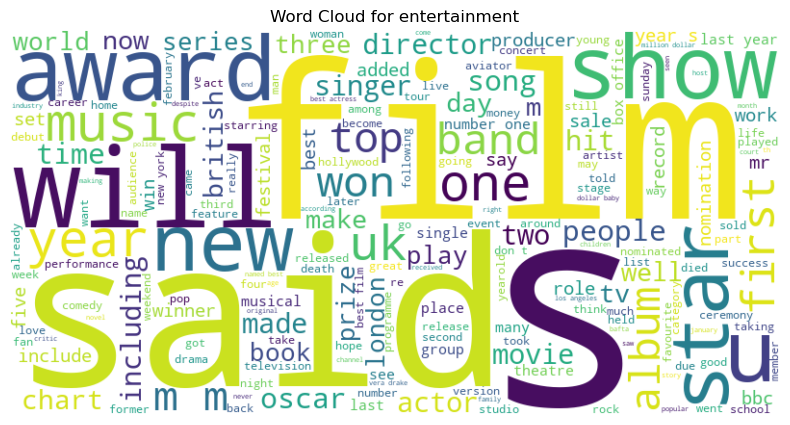

,ArticleId,Text,Category,clean_text,text_stats,word_count,unique_words,avg_word_length
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,"{'word_count': 294, 'unique_words': 170, 'avg_...",294,170,5.071429
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,"{'word_count': 315, 'unique_words': 186, 'avg_...",315,186,5.139683
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,"{'word_count': 488, 'unique_words': 234, 'avg_...",488,234,5.038934
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,"{'word_count': 623, 'unique_words': 286, 'avg_...",623,286,4.595506
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in m payout eighteen former enron...,"{'word_count': 349, 'unique_words': 208, 'avg_...",349,208,4.971347
...,...,...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,double eviction from big brother model caprice...,"{'word_count': 214, 'unique_words': 119, 'avg_...",214,119,4.635514
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,dj double act revamp chart show dj duo jk and ...,"{'word_count': 548, 'unique_words': 289, 'avg_...",548,289,4.456204
1487,1590,weak dollar hits reuters revenues at media gro...,business,weak dollar hits reuters revenues at media gro...,"{'word_count': 222, 'unique_words': 124, 'avg_...",222,124,4.567568
1488,1587,apple ipod family expands market apple has exp...,tech,apple ipod family expands market apple has exp...,"{'word_count': 546, 'unique_words': 264, 'avg_...",546,264,4.725275


In [15]:
produce_eda('BBC News Train.csv')

## Building and training models: Supervised and Unsupervised

In [6]:
class BaseTextClassifier:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(
            max_features=5000,
            stop_words='english',
            ngram_range=(1, 2)
        )
        self.label_encoder = LabelEncoder()
        
    def preprocess(self, X, y=None, fit=True):
        if fit:
            X_transformed = self.vectorizer.fit_transform(X)
            if y is not None:
                y_transformed = self.label_encoder.fit_transform(y)
                return X_transformed, y_transformed
        else:
            X_transformed = self.vectorizer.transform(X)
            if y is not None:
                y_transformed = self.label_encoder.transform(y)
                return X_transformed, y_transformed
        return X_transformed

class SupervisedClassifier(BaseTextClassifier):
    def __init__(self, model_type='lr'):
        super().__init__()
        if model_type == 'lr':
            self.model = LogisticRegression(max_iter=1000)
        elif model_type == 'nb':
            self.model = MultinomialNB()
        elif model_type == 'svm':
            self.model = LinearSVC(max_iter=1000)
            
    def fit(self, X, y):
        X_transformed, y_transformed = self.preprocess(X, y, fit=True)
        self.model.fit(X_transformed, y_transformed)
        
    def predict(self, X):
        X_transformed = self.preprocess(X, fit=False)
        predictions = self.model.predict(X_transformed)
        return self.label_encoder.inverse_transform(predictions)

class UnsupervisedClassifier(BaseTextClassifier):
    def __init__(self, n_components=50):
        super().__init__()
        self.nmf = NMF(n_components=n_components, random_state=42)
        self.centroids = None
        
    def fit(self, X, y):
        X_transformed, y_transformed = self.preprocess(X, y, fit=True)
        X_nmf = self.nmf.fit_transform(X_transformed)
        
        # Compute centroids
        unique_labels = np.unique(y_transformed)
        self.centroids = np.array([
            X_nmf[y_transformed == label].mean(axis=0)
            for label in unique_labels
        ])
        
    def predict(self, X):
        X_transformed = self.preprocess(X, fit=False)
        X_nmf = self.nmf.transform(X_transformed)
        distances = cdist(X_nmf, self.centroids)
        predictions = distances.argmin(axis=1)
        return self.label_encoder.inverse_transform(predictions)

## Model analysis and evaluation Strategy:

In [7]:
def evaluate_model(y_true, y_pred, model_name, data_split):
    """Evaluate model performance"""
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    print(f"\n{model_name} - {data_split} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    return accuracy

def compare_methods(df, train_sizes=[0.1, 0.2, 0.5, 1.0]):
    """Compare supervised and unsupervised methods with different training sizes"""
    results = []
    
    # Create train/test split
    X_train_full, X_test, y_train_full, y_test = train_test_split(
        df['Text'],
        df['Category'],
        test_size=0.2,
        stratify=df['Category'],
        random_state=42
    )
    
    # Initialize models
    models = {
        'Logistic Regression': SupervisedClassifier('lr'),
        'Naive Bayes': SupervisedClassifier('nb'),
        'Linear SVM': SupervisedClassifier('svm'),
        'NMF (Unsupervised)': UnsupervisedClassifier()
    }
    
    for train_size in train_sizes:
        if train_size < 1.0:
            X_train, _, y_train, _ = train_test_split(
                X_train_full,
                y_train_full,
                train_size=train_size,
                stratify=y_train_full,
                random_state=42
            )
        else:
            X_train, y_train = X_train_full, y_train_full
            
        print(f"\nTraining with {train_size*100}% of data")
        print(f"Training samples: {len(X_train)}")
        
        for model_name, model in models.items():
            # Train model
            model.fit(X_train, y_train)
            
            # Evaluate on train set
            train_pred = model.predict(X_train)
            train_acc = evaluate_model(y_train, train_pred, model_name, "Train")
            
            # Evaluate on test set
            test_pred = model.predict(X_test)
            test_acc = evaluate_model(y_test, test_pred, model_name, "Test")
            
            results.append({
                'model': model_name,
                'train_size': train_size,
                'train_accuracy': train_acc,
                'test_accuracy': test_acc,
                'overfitting': train_acc - test_acc
            })
    
    return pd.DataFrame(results)

def plot_results(results):
    """Plot comparison results"""
    # Plot training size vs accuracy
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    for model in results['model'].unique():
        model_results = results[results['model'] == model]
        plt.plot(model_results['train_size'], model_results['test_accuracy'], 
                marker='o', label=model)
    plt.xlabel('Training Data Size (%)')
    plt.ylabel('Test Accuracy')
    plt.title('Test Accuracy vs Training Size')
    plt.legend()
    plt.grid(True)
    
    # Plot overfitting
    plt.subplot(1, 2, 2)
    for model in results['model'].unique():
        model_results = results[results['model'] == model]
        plt.plot(model_results['train_size'], model_results['overfitting'], 
                marker='o', label=model)
    plt.xlabel('Training Data Size (%)')
    plt.ylabel('Overfitting (Train - Test Accuracy)')
    plt.title('Overfitting vs Training Size')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


Training with 10.0% of data
Training samples: 119

Logistic Regression - Train Performance:
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

     business       1.00      1.00      1.00        27
entertainment       1.00      1.00      1.00        22
     politics       1.00      1.00      1.00        22
        sport       1.00      1.00      1.00        27
         tech       1.00      1.00      1.00        21

     accuracy                           1.00       119
    macro avg       1.00      1.00      1.00       119
 weighted avg       1.00      1.00      1.00       119


Logistic Regression - Test Performance:
Accuracy: 0.8893

Classification Report:
               precision    recall  f1-score   support

     business       0.79      0.94      0.86        67
entertainment       0.93      0.95      0.94        55
     politics       0.93      0.78      0.85        55
        sport       0.89      0.99      0.94        69
         t


Logistic Regression - Train Performance:
Accuracy: 0.9983

Classification Report:
               precision    recall  f1-score   support

     business       1.00      0.99      1.00       134
entertainment       1.00      1.00      1.00       109
     politics       1.00      1.00      1.00       110
        sport       1.00      1.00      1.00       138
         tech       0.99      1.00      1.00       105

     accuracy                           1.00       596
    macro avg       1.00      1.00      1.00       596
 weighted avg       1.00      1.00      1.00       596


Logistic Regression - Test Performance:
Accuracy: 0.9597

Classification Report:
               precision    recall  f1-score   support

     business       0.93      0.97      0.95        67
entertainment       0.98      0.96      0.97        55
     politics       0.95      0.95      0.95        55
        sport       0.99      1.00      0.99        69
         tech       0.96      0.90      0.93        52

     

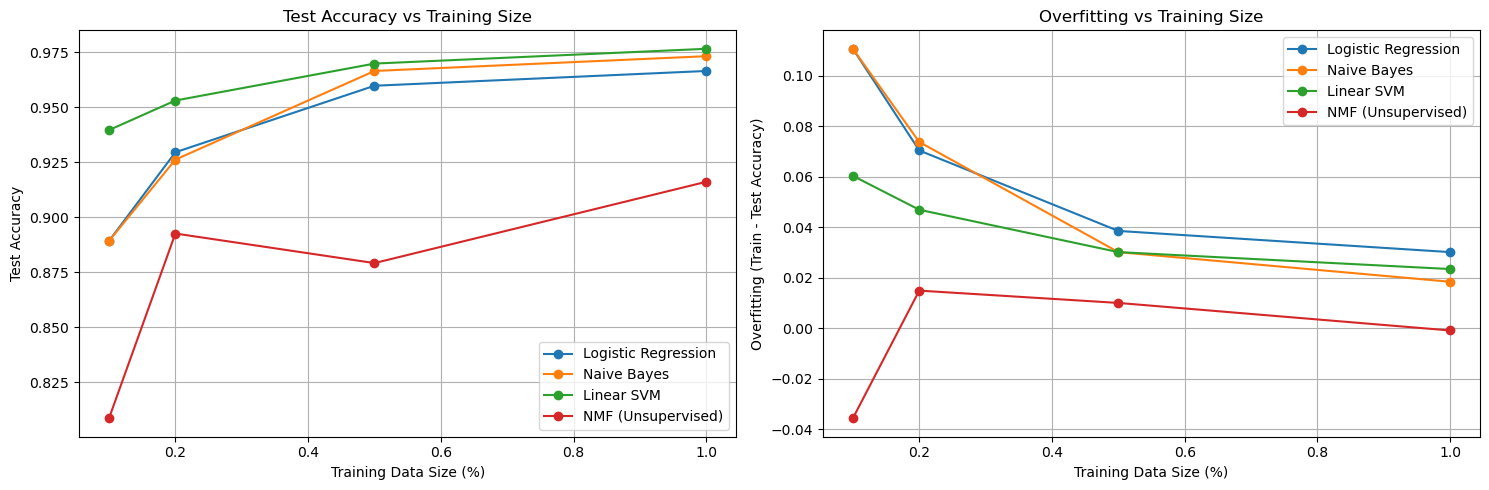


Summary of Results:
                    test_accuracy         overfitting
                             mean     std        mean
model                                                
Linear SVM                 0.9597  0.0167      0.0403
Logistic Regression        0.9362  0.0352      0.0625
NMF (Unsupervised)         0.8742  0.0462     -0.0029
Naive Bayes                0.9388  0.0390      0.0583


In [8]:
df = pd.read_csv('BBC News Train.csv')

# Run comparison
results = compare_methods(df)

# Plot results
plot_results(results)

# Print summary
print("\nSummary of Results:")
summary = results.groupby('model').agg({
    'test_accuracy': ['mean', 'std'],
    'overfitting': 'mean'
}).round(4)
print(summary)

# Run with:
# results = main('path_to_train.csv')

## Analysis of results
### Linear SVM:
Best performance (96% test accuracy)
Relatively low standard deviation (0.0167) indicating stable performance
Moderate overfitting (0.0403 or 4% difference between train and test)


### Logistic Regression:
Good performance (94% test accuracy)
Higher standard deviation (0.0352) suggesting more sensitivity to training data size
Higher overfitting (0.0625 or 6.25% difference)


### NMF (Unsupervised):

Lowest accuracy (87% test accuracy)
Highest standard deviation (0.0462) indicating less stable performance
Slightly negative overfitting (-0.0029) suggesting slight underfitting
This negative overfitting is interesting - it means the model sometimes performs better on test data than training data

### Naive Bayes:

Good performance (94% test accuracy)
Relatively high standard deviation (0.0390)
Moderate overfitting (0.0583 or 5.83% difference)

### Key Takeaways:

If maximum accuracy was my goal I would Choose Linear SVM. If stability is most important: Linear SVM has the lowest std deviation. If overfitting is a concern: NMF shows the least overfitting. For balanced performance: Both Logistic Regression and Naive Bayes offer similar good performance

The results show that for this particular text classification task:

* Supervised methods (especially Linear SVM) outperform the unsupervised approach
* All methods achieve good accuracy
* The unsupervised method (NMF) shows less overfitting but at the cost of lower accuracy
* The supervised methods all show some degree of overfitting but compensate with higher accuracy